# Bay Wheel Trip Data:

This project aims to analyze the baywheel trip data:<br>
Each trip is anonymized and includes:

    Trip Duration (seconds)
    Start Time and Date
    End Time and Date
    Start Station ID
    Start Station Name
    Start Station Latitude
    Start Station Longitude
    End Station ID
    End Station Name
    End Station Latitude
    End Station Longitude
    Bike ID
    User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('202005-baywheels-tripdata.csv')
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,BA4B4D93677877E8,electric_bike,2020-05-18 22:16:06,2020-05-18 22:28:20,NaN,NaN,NaN,NaN,37.3443,-121.9218,37.3443,-121.9217,casual,False
1,92634E825C7303CC,electric_bike,2020-05-19 16:57:35,2020-05-19 17:29:56,NaN,NaN,NaN,NaN,37.7286,-122.4921,37.7154,-122.4854,casual,False
2,1FCDD14C62521CC1,electric_bike,2020-05-18 20:08:14,2020-05-18 20:14:25,NaN,NaN,Webster St at Clay St,492.0,37.7919,-122.4174,37.7906,-122.4325,casual,False
3,3A5CEC684CA9FA18,electric_bike,2020-05-19 14:05:08,2020-05-19 14:14:16,NaN,NaN,NaN,NaN,37.7557,-122.4165,37.7681,-122.4266,casual,False
4,1FF95A9C2D1ED7F8,electric_bike,2020-05-10 17:45:54,2020-05-10 18:29:29,Pier 1/2 at The Embarcadero,12.0,NaN,NaN,37.7964,-122.3946,37.7780,-122.4144,casual,False


The data types of the data set is defined as below:

In [3]:
# print the data shape and info
print(df.shape)
print(df.dtypes)

(138251, 14)
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
is_equity                bool
dtype: object


The statistics of the data is defined as:

In [4]:
#print statistical info of data
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,87315.000000,84779.000000,138251.000000,138251.000000,138027.000000,138027.000000
mean,227.397022,226.186567,37.722310,-122.343617,37.722268,-122.344021
std,170.232761,170.207720,0.151435,0.182993,0.151488,0.183225
min,3.000000,3.000000,37.239200,-122.514300,37.004600,-122.559000
25%,74.000000,74.000000,37.760100,-122.433700,37.760000,-122.433800
50%,177.000000,171.000000,37.773500,-122.413200,37.773500,-122.413200
75%,386.000000,386.000000,37.787300,-122.390400,37.787400,-122.390600
max,521.000000,521.000000,37.880200,-121.774600,37.962100,-121.560600


### What is the structure of your dataset?
The data set incli=udes the following variables:

    Trip Duration (seconds)
    Start Time and Date
    End Time and Date
    Start Station ID
    Start Station Name
    Start Station Latitude
    Start Station Longitude
    End Station ID
    End Station Name
    End Station Latitude
    End Station Longitude
    Bike ID
    User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)


### What is/are the main feature(s) of interest in your dataset?

We aim to analyze the trip time and location,the ride type and membership type as well.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

    started_at
    ended_at
    start_lat
    start_lng
    end_lat
    end_lng
    casual_member
    rideable_type

# 1. Univariate Plot:
In this section we examine the single variables of the datset. We are interested in studying the distribution of the following variable:<br>
- rideable_type
- member_casual
- is_equity<br>
Also, we used the the start and end time of each trip to calculate the duration of each one.


## The Count of different bike types:

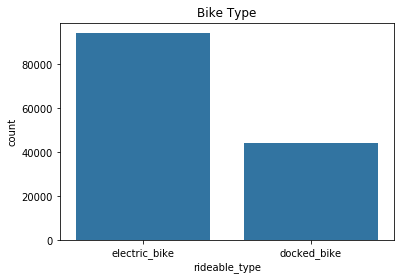

In [5]:
sb.countplot(data=df,x='rideable_type',color=sb.color_palette()[0]).set_title('Bike Type');


Q1:What is the most used bike type?<br>
Most of the bikes used are "Electric bikes"

## The count of membership types:

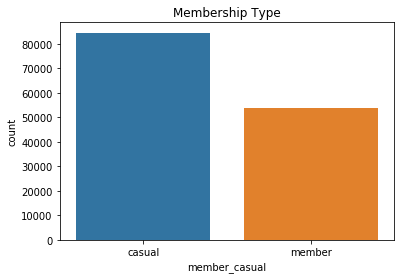

In [6]:
sb.countplot(data=df,x='member_casual').set_title('Membership Type');

Q2:What is the most membership type participate in races?<br>
Most of the members in the races are "casual" members

## The percentage of the members of each membership type:

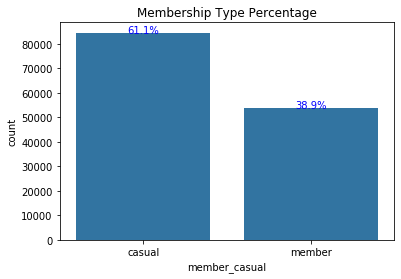

In [7]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'member_casual', color = base_color).set_title('Membership Type Percentage')

# add annotations
n_points = df.shape[0]
cat_counts = df['member_casual'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'b')

## The membership participation of each bike type:

Text(0.5, 1.0, 'Membership Vs. Bike Type')

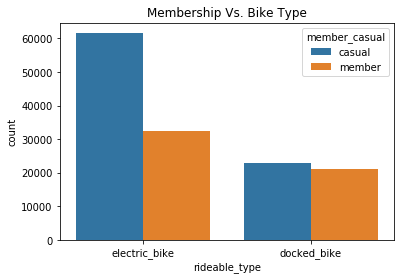

In [8]:
sb.countplot(data=df,x='rideable_type',hue='member_casual').set_title('Membership Vs. Bike Type')

## Plot the equity of each bike type:

Text(0.5, 1.0, 'Bike Type Vs. Equity')

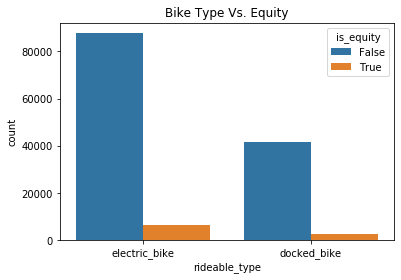

In [9]:
sb.countplot(data=df,x='rideable_type',hue='is_equity').set_title('Bike Type Vs. Equity')

## Plot the equity of each membership type

Text(0.5, 1.0, ' Membership Type vs. Equity')

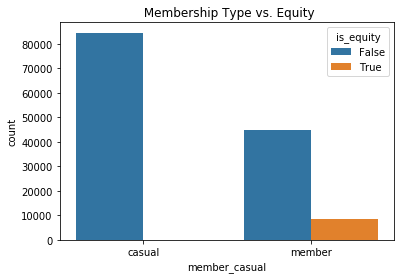

In [10]:
sb.countplot(data=df,x='member_casual',hue='is_equity').set_title(' Membership Type vs. Equity')

## Calculate the Trip Duration: 

In [11]:
#Convert start and end dates to date time
df['start_date']=pd.to_datetime(df['started_at'],errors='ignore')
df['end_date']=pd.to_datetime(df['ended_at'],errors='ignore')

In [12]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity,start_date,end_date
0,BA4B4D93677877E8,electric_bike,2020-05-18 22:16:06,2020-05-18 22:28:20,NaN,NaN,NaN,NaN,37.3443,-121.9218,37.3443,-121.9217,casual,False,2020-05-18 22:16:06,2020-05-18 22:28:20
1,92634E825C7303CC,electric_bike,2020-05-19 16:57:35,2020-05-19 17:29:56,NaN,NaN,NaN,NaN,37.7286,-122.4921,37.7154,-122.4854,casual,False,2020-05-19 16:57:35,2020-05-19 17:29:56
2,1FCDD14C62521CC1,electric_bike,2020-05-18 20:08:14,2020-05-18 20:14:25,NaN,NaN,Webster St at Clay St,492.0,37.7919,-122.4174,37.7906,-122.4325,casual,False,2020-05-18 20:08:14,2020-05-18 20:14:25
3,3A5CEC684CA9FA18,electric_bike,2020-05-19 14:05:08,2020-05-19 14:14:16,NaN,NaN,NaN,NaN,37.7557,-122.4165,37.7681,-122.4266,casual,False,2020-05-19 14:05:08,2020-05-19 14:14:16
4,1FF95A9C2D1ED7F8,electric_bike,2020-05-10 17:45:54,2020-05-10 18:29:29,Pier 1/2 at The Embarcadero,12.0,NaN,NaN,37.7964,-122.3946,37.7780,-122.4144,casual,False,2020-05-10 17:45:54,2020-05-10 18:29:29


In [13]:
#Calculate the trip duration.
df['duration']=df['end_date']-df['start_date']

In [14]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity,start_date,end_date,duration
0,BA4B4D93677877E8,electric_bike,2020-05-18 22:16:06,2020-05-18 22:28:20,NaN,NaN,NaN,NaN,37.3443,-121.9218,37.3443,-121.9217,casual,False,2020-05-18 22:16:06,2020-05-18 22:28:20,00:12:14
1,92634E825C7303CC,electric_bike,2020-05-19 16:57:35,2020-05-19 17:29:56,NaN,NaN,NaN,NaN,37.7286,-122.4921,37.7154,-122.4854,casual,False,2020-05-19 16:57:35,2020-05-19 17:29:56,00:32:21
2,1FCDD14C62521CC1,electric_bike,2020-05-18 20:08:14,2020-05-18 20:14:25,NaN,NaN,Webster St at Clay St,492.0,37.7919,-122.4174,37.7906,-122.4325,casual,False,2020-05-18 20:08:14,2020-05-18 20:14:25,00:06:11
3,3A5CEC684CA9FA18,electric_bike,2020-05-19 14:05:08,2020-05-19 14:14:16,NaN,NaN,NaN,NaN,37.7557,-122.4165,37.7681,-122.4266,casual,False,2020-05-19 14:05:08,2020-05-19 14:14:16,00:09:08
4,1FF95A9C2D1ED7F8,electric_bike,2020-05-10 17:45:54,2020-05-10 18:29:29,Pier 1/2 at The Embarcadero,12.0,NaN,NaN,37.7964,-122.3946,37.7780,-122.4144,casual,False,2020-05-10 17:45:54,2020-05-10 18:29:29,00:43:35


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138251 entries, 0 to 138250
Data columns (total 17 columns):
ride_id               138251 non-null object
rideable_type         138251 non-null object
started_at            138251 non-null object
ended_at              138251 non-null object
start_station_name    87315 non-null object
start_station_id      87315 non-null float64
end_station_name      84779 non-null object
end_station_id        84779 non-null float64
start_lat             138251 non-null float64
start_lng             138251 non-null float64
end_lat               138027 non-null float64
end_lng               138027 non-null float64
member_casual         138251 non-null object
is_equity             138251 non-null bool
start_date            138251 non-null datetime64[ns]
end_date              138251 non-null datetime64[ns]
duration              138251 non-null timedelta64[ns]
dtypes: bool(1), datetime64[ns](2), float64(6), object(7), timedelta64[ns](1)
memory usage: 17.0+ M

In [16]:
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,duration
count,87315.000000,84779.000000,138251.000000,138251.000000,138027.000000,138027.000000,138251
mean,227.397022,226.186567,37.722310,-122.343617,37.722268,-122.344021,0 days 00:28:59.217242
std,170.232761,170.207720,0.151435,0.182993,0.151488,0.183225,0 days 04:35:19.518120
min,3.000000,3.000000,37.239200,-122.514300,37.004600,-122.559000,-1 days +23:59:13
25%,74.000000,74.000000,37.760100,-122.433700,37.760000,-122.433800,0 days 00:07:28
50%,177.000000,171.000000,37.773500,-122.413200,37.773500,-122.413200,0 days 00:14:10
75%,386.000000,386.000000,37.787300,-122.390400,37.787400,-122.390600,0 days 00:27:07
max,521.000000,521.000000,37.880200,-121.774600,37.962100,-121.560600,23 days 20:30:15


Q3: What is the duration of each trip?<br>
The trips duration varies from 14 minutes to 23 days.

In [17]:
#check whether there is any invalid dutation ocurrs in the dataset(i.e. end date is less than start date)
invalid_duration=df[df['duration']<'0 days 0:0:0']

In [18]:
invalid_duration

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity,start_date,end_date,duration
17718,17CC367A6FB8749B,docked_bike,2020-05-04 09:43:43,2020-05-04 09:43:34,Woolsey St at Sacramento St,385.0,Ashby BART Station,241.0,37.8506,-122.2782,37.8525,-122.2702,member,False,2020-05-04 09:43:43,2020-05-04 09:43:34,-1 days +23:59:51
17719,43190746FD687461,docked_bike,2020-05-05 22:17:23,2020-05-05 22:17:13,Russell St at College Ave,249.0,Woolsey St at Sacramento St,385.0,37.8585,-122.2533,37.8506,-122.2782,member,False,2020-05-05 22:17:23,2020-05-05 22:17:13,-1 days +23:59:50
17720,00CB2943A1A5FD4A,docked_bike,2020-05-02 19:07:28,2020-05-02 19:07:16,Shattuck Ave at 51st St,174.0,Broadway at 30th St,178.0,37.8368,-122.2640,37.8194,-122.2619,member,False,2020-05-02 19:07:28,2020-05-02 19:07:16,-1 days +23:59:48
20112,50970166EAE3A7AD,docked_bike,2020-05-22 16:46:20,2020-05-22 16:45:55,Parker St at Fulton St,266.0,Channing Way at Shattuck Ave,252.0,37.8625,-122.2648,37.8658,-122.2674,member,True,2020-05-22 16:46:20,2020-05-22 16:45:55,-1 days +23:59:35
20775,D12A18657FF5E17F,docked_bike,2020-05-04 19:37:40,2020-05-04 19:36:53,The Embarcadero at Pier 38,38.0,Jackson Playground,115.0,37.7829,-122.3879,37.7650,-122.3988,casual,False,2020-05-04 19:37:40,2020-05-04 19:36:53,-1 days +23:59:13
22327,9D5602424CE332EA,docked_bike,2020-05-31 17:56:46,2020-05-31 17:56:34,Civic Center/UN Plaza BART Station (Market St ...,44.0,17th St at Dolores St,107.0,37.7811,-122.4117,37.7630,-122.4265,member,False,2020-05-31 17:56:46,2020-05-31 17:56:34,-1 days +23:59:48
22331,0B28380EC5981E4C,docked_bike,2020-05-21 11:28:27,2020-05-21 11:28:10,Montgomery St BART Station (Market St at 2nd St),21.0,Commercial St at Montgomery St,13.0,37.7896,-122.4008,37.7942,-122.4029,member,False,2020-05-21 11:28:27,2020-05-21 11:28:10,-1 days +23:59:43
23760,F4617269732B1E64,docked_bike,2020-05-17 13:12:01,2020-05-17 13:11:37,Brannan St at 4th St,453.0,McAllister St at Baker St,52.0,37.7779,-122.3970,37.7774,-122.4418,casual,False,2020-05-17 13:12:01,2020-05-17 13:11:37,-1 days +23:59:36
24407,2E3E6FFD02EC221A,docked_bike,2020-05-28 04:41:15,2020-05-28 04:41:03,22nd St at Dolores St,131.0,Harrison St at 20th St,129.0,37.7550,-122.4257,37.7589,-122.4125,member,False,2020-05-28 04:41:15,2020-05-28 04:41:03,-1 days +23:59:48
30219,553619B3C52EB602,docked_bike,2020-05-26 16:32:34,2020-05-26 16:32:20,5th Ave at Anza St,466.0,17th St at Dolores St,107.0,37.7795,-122.4631,37.7630,-122.4265,member,False,2020-05-26 16:32:34,2020-05-26 16:32:20,-1 days +23:59:46


In [19]:
invalid_duration.shape

(211, 17)

## Extract the valid duration rows:

In [20]:
valid_duration=df[df['duration']>'0 days 0:0:0']

In [21]:
df['durat_flt']=df['duration'].dt.total_seconds()

In [22]:
valid_duration=df[df['duration']>'0 days 0:0:0']

## Plot the duration histogram:

The duration of the trips varies from several minutes to 23 days so we had to normalize the values using log(n)

(array([ 5364.,  6106.,  8501.,  9505., 10052.,  9329.,  8708.,  7693.,
         6952.]),
 array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900]),
 <a list of 9 Patch objects>)

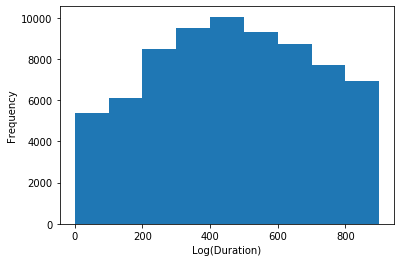

In [23]:
plt.title='Histogram of Log10(Duration)'
plt.xlabel('Log(Duration)')
plt.ylabel('Frequency')
plt.hist(data=valid_duration,x='durat_flt',bins=np.arange(0,1000,100))

Most of the log(duration) trips varies from 400 to 500.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
From the Univariate exploration we conclude that:
- Most of the members are casual members with 61.1% of the total members while 38.9% are members.
- Most of the bike type used in the race is electric bike.
- The duration of the trips varies from several minutes to days.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
To investigate the duration of the trip we had to:
- Convert the start and end time of the trip to datetime datatype
- calculate the trip duration.

# Bivariate Plot:
In this section we discuss the relationship between the start and end location to investigate the trip path.

## The relation between start and end Location:

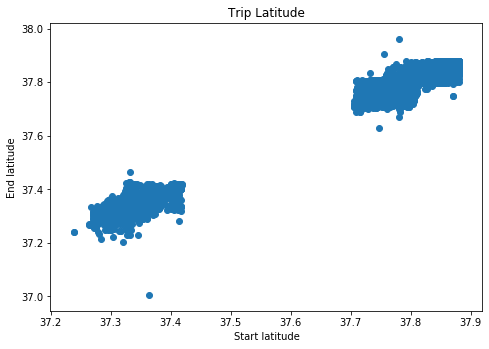

In [24]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Trip Latitude')
ax.set_xlabel('Start latitude')
ax.set_ylabel('End latitude')
ax.scatter(data=valid_duration,x='start_lat',y='end_lat')


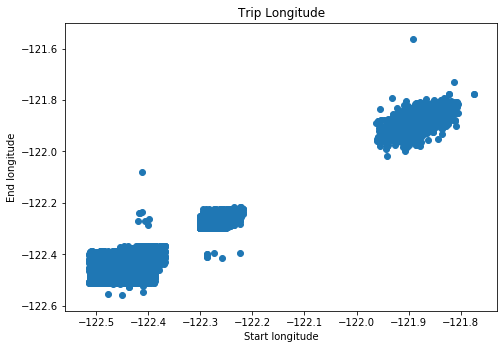

In [25]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_title('Trip Longitude')
ax.set_xlabel('Start longitude')
ax.set_ylabel('End longitude')
ax.scatter(data=valid_duration,x='start_lng',y='end_lng')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
From the above two plots that represent the trip start and end location,<br>
we observe that the trip start and end at the the same location.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
No.

# 3.Multivariate Plots:
In this section, we discuss the relationship between the start and end location along with the ridetype and the member ship.
Also, we investigate the distribution of the number of trips in each day in May2020.

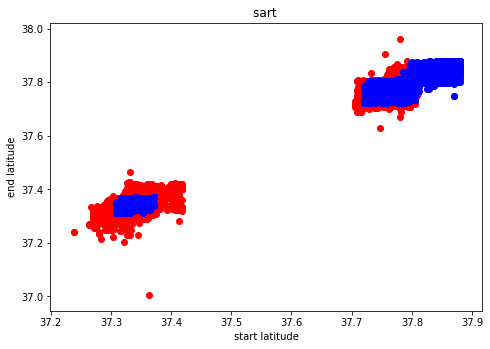

In [26]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel('start latitude')
ax.set_ylabel('end latitude')
ax.set_title('sart ')
ax.scatter(data=valid_duration[valid_duration['rideable_type']=='electric_bike'],x='start_lat',y='end_lat',color='r')
ax.scatter(data=valid_duration[valid_duration['rideable_type']=='docked_bike'],x='start_lat',y='end_lat',color='b')

The Red points represent the electric bikes while the blue points represent the docked bikes.

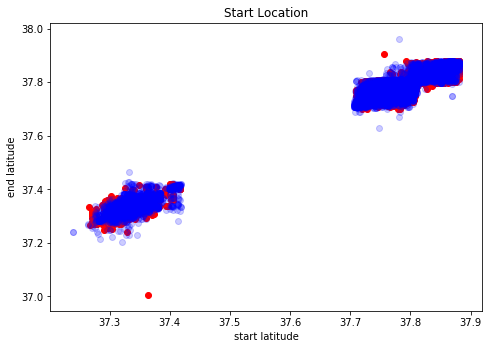

In [27]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel('start latitude')
ax.set_ylabel('end latitude')
ax.set_title('Start Location')
ax.scatter(data=valid_duration[valid_duration['member_casual']=='member'],x='start_lat',y='end_lat',color='r')
ax.scatter(data=valid_duration[valid_duration['member_casual']=='casual'],x='start_lat',y='end_lat',color='b',alpha=0.2)

The Red points represent the usual membership while the blue points represent the casaul membership.


## Extract day from the trip start date:

In [28]:
valid_duration['day']=valid_duration.start_date.dt.day

C:\Users\monaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
valid_duration['day'].value_counts()

24    7085
23    7044
25    6960
16    6287
31    5859
30    5808
3     5377
22    5336
2     4860
17    4836
9     4827
29    4693
8     4383
27    4356
10    4270
26    4255
15    4198
21    4094
28    3958
1     3832
19    3813
20    3749
7     3721
6     3490
18    3388
5     3275
4     3192
12    3067
13    2867
14    2741
11    2380
Name: day, dtype: int64

In [30]:
Pivot=valid_duration.pivot_table(valid_duration, index='day', columns='rideable_type',
                      aggfunc='count', fill_value=None, margins=False,
                      dropna=True, margins_name='All')
Pivot['duration']

rideable_type,docked_bike,electric_bike
day,,
1,1252,2580
2,1553,3307
3,1902,3475
4,992,2200
5,1034,2241
6,1122,2368
7,1206,2515
8,1354,3029
9,1744,3083


Text(0.5, 1, 'Number of races per day')

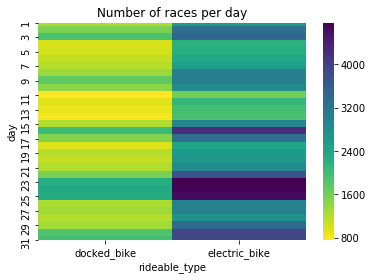

In [31]:
sb.heatmap(Pivot['duration'],cmap='viridis_r').set_title('Number of races per day')

Most of the trips were done by electric bikes in the last week of May 2020.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Most of the trips were done by electric bikes in the last week of May 2020.

### Were there any interesting or surprising interactions between features?

No